In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kunet2d',
           filter_num=[16, 32, 64, 128, 256, 512, 1024],
           stack_num_down=3,
           stack_num_up=3,
           activation='ReLU',
           output_activation='Sigmoid',
           batch_norm=True,
           pool=True,
           unpool=True,
           weights='imagenet',
           optimizer=None, # default is optimizers.Adam(learning_rate=1e-3)
           loss=None, # default is losses.binary_crossentropy
           metric=None # default is Util.dice_coef           
          )

*** GP2  KUNet2D ***
Working directory: /tmp/tmp5hwqxa38GP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [5]:
images = images[:5000]
masks = masks[:5000]

In [6]:
images.shape

(5000, 512, 512, 1)

In [7]:
masks.shape

(5000, 512, 512, 1)

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [ ]:

R.run(images=images, masks=masks, weights=weights, runs=5)

Weights OK!
******
Loop 0
Epoch 1/100
4/4 [==============================] - 37s 6s/step - loss: 0.4005 - dice_coef: 0.2310 - val_loss: 0.7134 - val_dice_coef: 0.1806
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: 0.3601 - dice_coef: 0.2720 - val_loss: 0.6923 - val_dice_coef: 0.1776
Epoch 3/100
4/4 [==============================] - 5s 1s/step - loss: 0.3602 - dice_coef: 0.2714 - val_loss: 0.6765 - val_dice_coef: 0.1756
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: 0.3600 - dice_coef: 0.2719 - val_loss: 0.6635 - val_dice_coef: 0.1743
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 0.3599 - dice_coef: 0.2721 - val_loss: 0.6521 - val_dice_coef: 0.1733
Epoch 6/100
4/4 [==============================] - 5s 1s/step - loss: 0.3600 - dice_coef: 0.2719 - val_loss: 0.6418 - val_dice_coef: 0.1725
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: 0.3605 - dice_coef: 0.2716 - val_loss: 0.6324 - val_dice_coef: 

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()

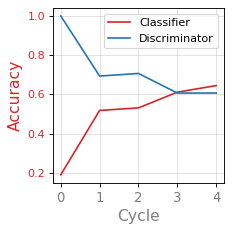

In [18]:
R.plot()

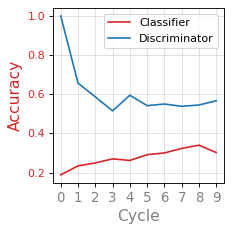

In [18]:
R.plot()

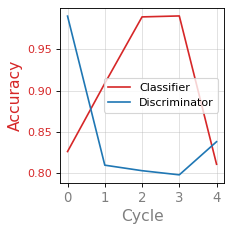

In [17]:
R.plot()